In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
encodings=["utf-8","latin1","ISO-8859-1","cp1252"]
file_path ="spam.csv"
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}") 
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}") 
        continue
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['v1']= encoder.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()   #check null values

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# 2. Data Exploration

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

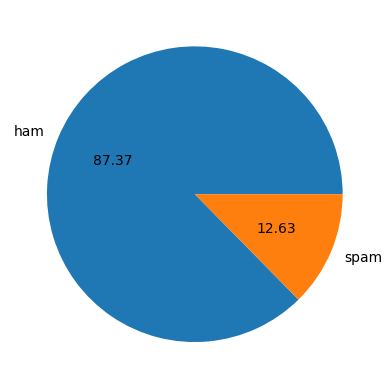

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)
df.head()

C:\Users\sanja\AppData\Local\Temp\ipykernel_1560\83982535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\sanja\AppData\Local\Temp\ipykernel_1560\3620582556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\sanja\AppData\Local\Temp\ipykernel_1560\3264193327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

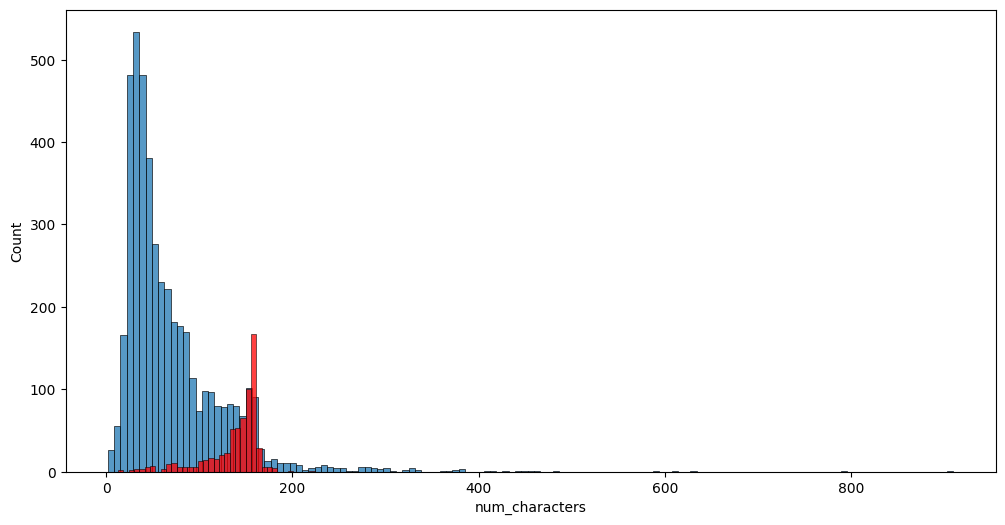

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

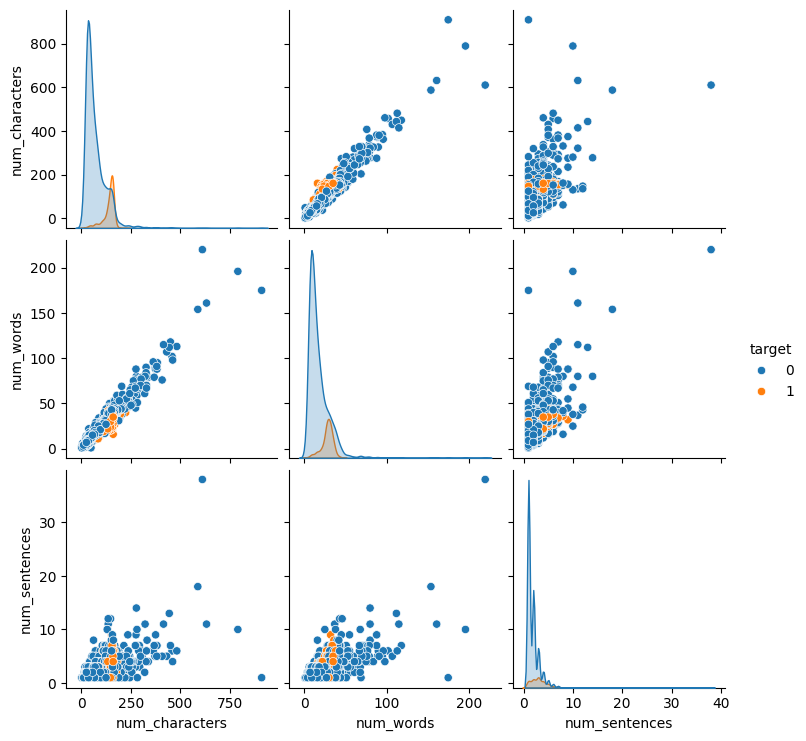

In [30]:
sns.pairplot(df,hue='target')

# Data Preprocessing

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') # You may need to download the stopwords dataset
ps= PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum(): 
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.") 
print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [33]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\sanja\AppData\Local\Temp\ipykernel_1560\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text' ].tolist():
    for word in msg.split(): 
        spam_corpus.append(word)

In [36]:
len(spam_corpus)

9939

In [37]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text' ].tolist():
    for word in msg.split(): 
        ham_corpus.append(word)

In [38]:
len(ham_corpus)

35404

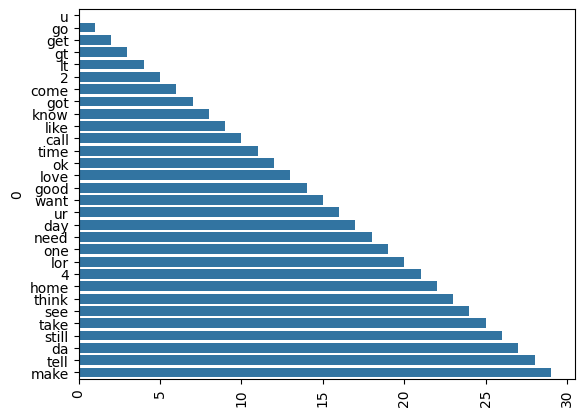

In [39]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common (30))[0]) 
plt.xticks(rotation='vertical')
plt.show()

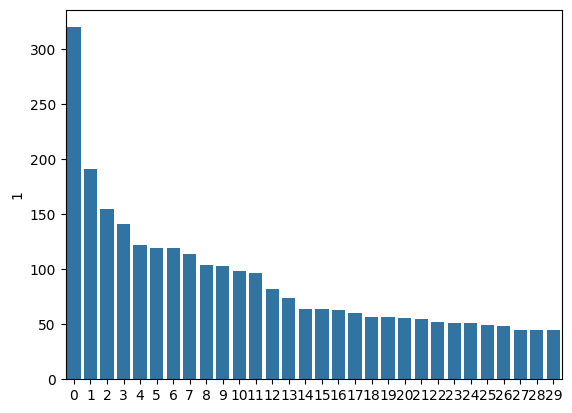

In [40]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common (30))[1]) 
plt.xticks(rotation='horizontal')
plt.show()

# building the model

In [41]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [42]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [43]:
X.shape

(5169, 3000)

In [44]:
y=df['target'].values

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [48]:
gnb= GaussianNB()
mnb =MultinomialNB()
bnb =BernoulliNB()

In [49]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print('precision:',precision_score(y_test,y_pred3))

accuracy : 0.9835589941972921
[[895   1]
 [ 16 122]]
precision: 0.991869918699187


In [50]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

In [51]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier() 
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5) 
lrc = LogisticRegression(solver='liblinear', penalty='l1') 
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2) 
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [52]:
clfs= {
    'SVC': svc,
    "KN": knc, 
    "NB": mnb,
    "DT": dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    
}

In [53]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [54]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [55]:
accuracy_scores=[]
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision= train_classifier(clf, X_train,y_train,X_test,y_test)
    print("_____________________________________________")
    print("For",name)
    print("Accuracy :" ,current_accuracy) 
    print("Precision :",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

_____________________________________________
For SVC
Accuracy : 0.9758220502901354
Precision : 0.9747899159663865
_____________________________________________
For KN
Accuracy : 0.9052224371373307
Precision : 1.0
_____________________________________________
For NB
Accuracy : 0.9709864603481625
Precision : 1.0
_____________________________________________
For DT
Accuracy : 0.9274661508704062
Precision : 0.8118811881188119
_____________________________________________
For LR
Accuracy : 0.9584139264990329
Precision : 0.9702970297029703
_____________________________________________
For RF
Accuracy : 0.9758220502901354
Precision : 0.9829059829059829
_____________________________________________
For AdaBoost
Accuracy : 0.960348162475822
Precision : 0.9292035398230089


In [56]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [57]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
3,DT,0.927466,0.811881


In [58]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [59]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,DT,Accuracy,0.927466
7,KN,Precision,1.000000
8,NB,Precision,1.000000
9,RF,Precision,0.982906


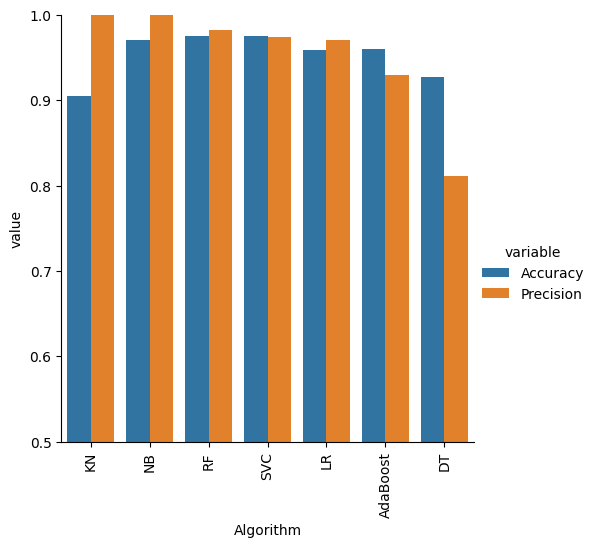

In [60]:
sns.catplot(x = 'Algorithm', y='value',hue= 'variable', data=performance_df1, kind='bar', height=5) 
plt.ylim(0.5,1.0)
plt.xticks (rotation="vertical")
plt.show()


In [61]:
svc= SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb= MultinomialNB()
etc =ExtraTreesClassifier(n_estimators=50, random_state=2) 
from sklearn.ensemble import VotingClassifier

In [62]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [63]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [64]:
y_pred= voting.predict(X_test) 
print("Accuracy", accuracy_score(y_test,y_pred)) 
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb')) 
pickle.dump(mnb,open('model.pkl','wb'))

In [66]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB

#Sample text data and corresponding Labels (replace with your actual data)
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"] 
y_train = [0, 1, 0] # Example labels (e for negative, 1 for positive)

# Create and train the TF-IDF vectorizer 
tfidf = TfidfVectorizer(lowercase=True, stop_words='english') 
X_train_tfidf = tfidf.fit_transform(X_train)

#Create and train the Naive Bayes classifier 
mnb=MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

#Save the trained TF-IDF vectorizer and Naive Bayes model to files 
with open('vectorizer.pkl', 'wb') as vectorizer_file: 
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl','wb')as model_file:
    pickle.dump(mnb,model_file)